In [1]:
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

# Bias vs. Variance


One of the reason why Neural Networks gain much popularity is because of its ability to bypass this trade-off and perform well is both aspects (low bias & variance) in which other machine learning models face limitations. In simplified terms, high bias signifies under-fitting of the model onto the dataest and high variance signifies over-fitting. This is often caused by a number of possibilities such as the complexity of the problem, the complexity of the model used, etc.

In order to identify whether our model suffers from high bias or high variance, we often split our datasets into 2 sub-datasets called the Training Set and the Validation Set. At times, we would split into 3 sub-datasets where we would include a Test Set as well. However, to illustrate the Bias vs. Variance trade-off, I will be using 2 for simplicity sake. 

Based on the accuracy or performance on these 2 sets, we will be able to identify if our model suffers from either problems. We will be mainly looking at 2 factors.
1. The Accuracy of the Training set
2. The difference between the Accuracy of the Training and Validation Set

In order to gauge how well the accuracy of the model is, we require some context. We often compare the model's accuracy to a 'human's' accuracy. Given that I am using synthetic data, lets set this value to be 70%.

# Generate data

I will be using the make_circles function from sklearn.datasets to generate our dataset. This dataset offers sufficient complexity (non-linear) to illustrate the bias and variance trade-off.

In [2]:
from sklearn.datasets import make_circles
from sklearn.metrics import classification_report

In [3]:
x, y = make_circles(n_samples=1000,
                    noise=0.2,
                    factor=0.8
                   )

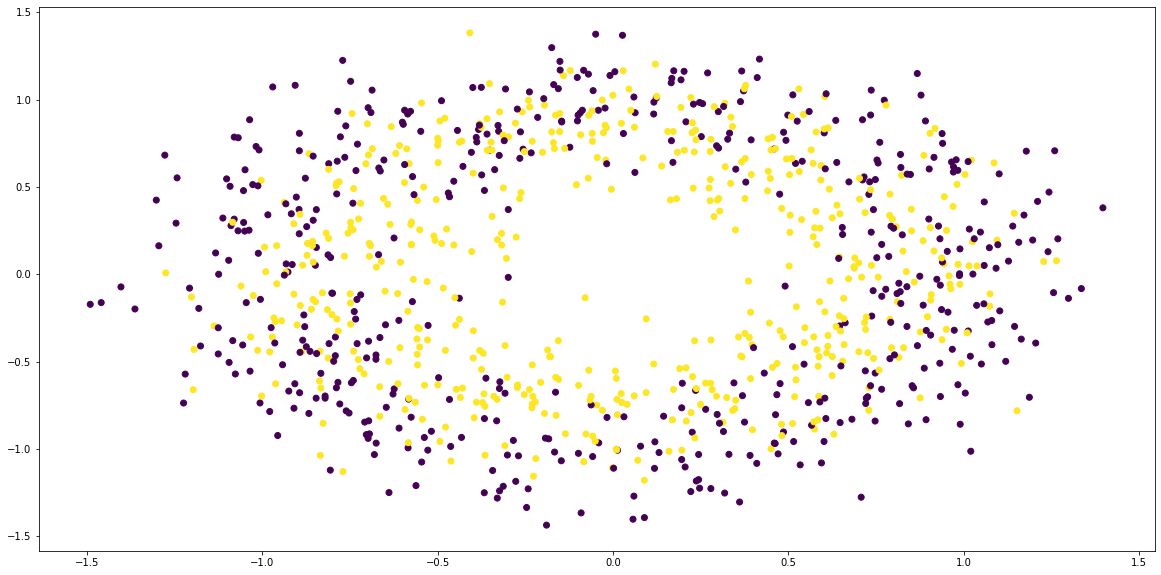

In [4]:
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=y)

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

# Split into train and test set - 90% - 10% split

In [6]:
# simple split. sklearn offers their own train_test_split function as well
x_train = x[:900]
x_val = x[900:]
y_train = y[:900]
y_val = y[900:]

# Simple Network - Linear

In [7]:
# Simple 1 layer network with 2 neurons with a Sigmoid function to reduce to probabilities
simple_network = nn.Sequential(
    nn.Linear(2,2)
)

# cost - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(simple_network.parameters(), lr=0.1)

In [8]:
epochs = 500
loss = []
validation_loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    output = simple_network(x_train)# forward prop
    running_loss = criterion(output, y_train) # calculate loss
    loss.append(running_loss)
    running_loss.backward() # calculate gradients (backprop)
    optimiser.step() # update weights
    
    output = simple_network(x_val) # outputs of validation set
    val_loss = criterion(output, y_val) # validation loss
    validation_loss.append(val_loss)

              precision    recall  f1-score   support

           0       0.74      0.03      0.06       435
           1       0.52      0.99      0.68       465

    accuracy                           0.53       900
   macro avg       0.63      0.51      0.37       900
weighted avg       0.63      0.53      0.38       900



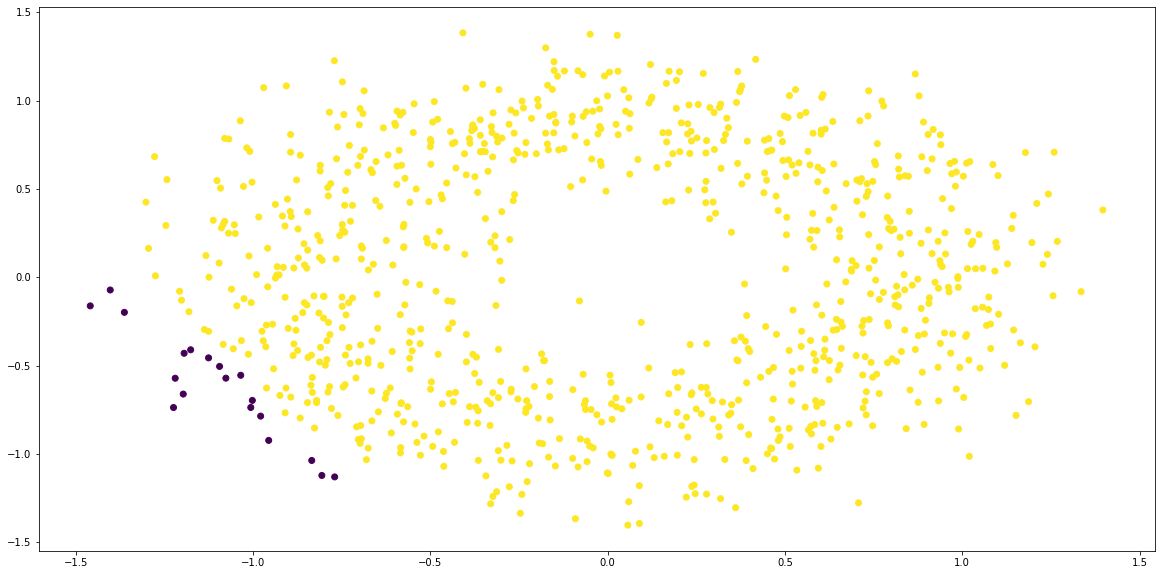

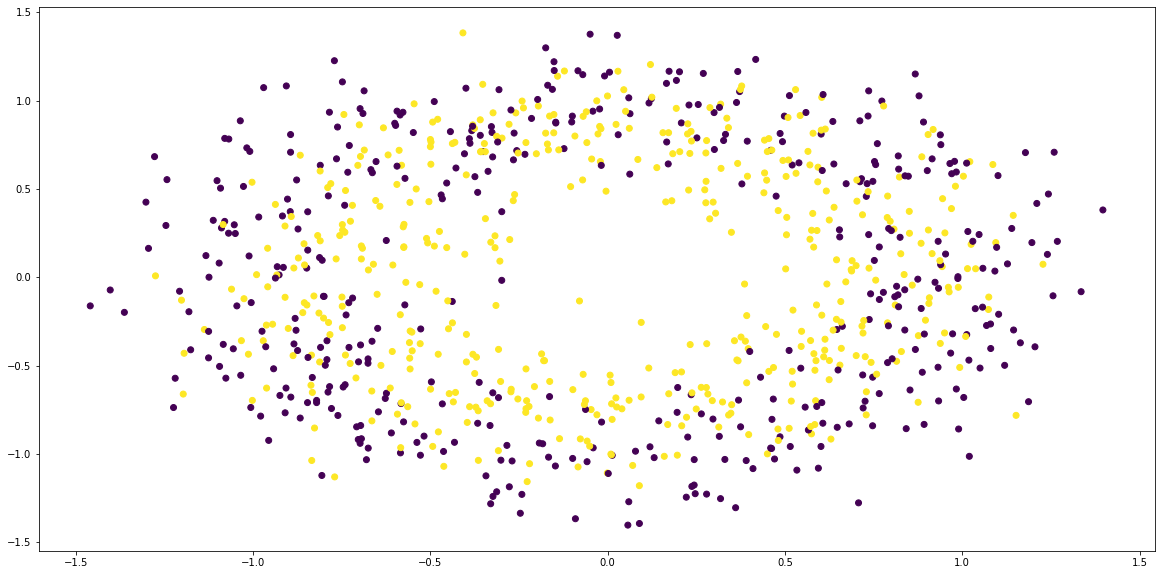

In [9]:
# Training accuracy
output = simple_network(x_train)
_, predictions = torch.max(output, axis=1)
print(classification_report(y_train, predictions))

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_train[:,0], x_train[:,1], c=predictions)

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

Firstly, we observe that the model is unable to map the function accurately. Although the true function is circular, we see that our model is only able to map a linear decision boundary. We call this under-fitting where the model fails to accurately map the underlying function.

This resulted in a very poor performance of ~50% overall and compared to our pre-defined human accuracy rate. It is unlikely that we will use such a model in a real-world application. As such, we say that this model suffers from high bias.

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        65
           1       0.35      1.00      0.52        35

    accuracy                           0.36       100
   macro avg       0.68      0.51      0.28       100
weighted avg       0.77      0.36      0.20       100



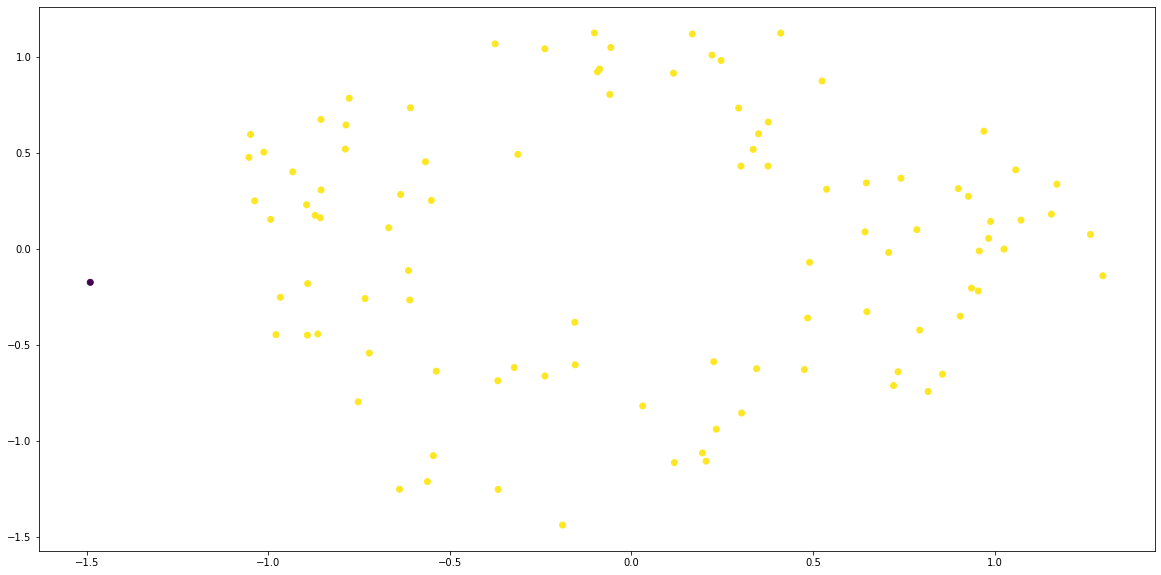

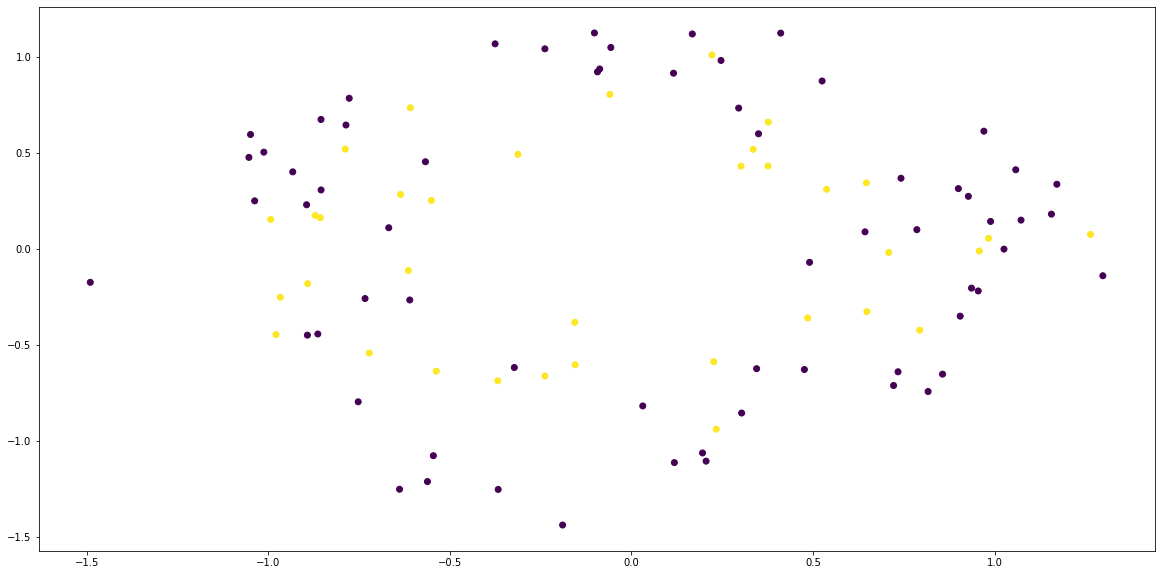

In [10]:
# Validation accuracy
output = simple_network(x_val)
_, predictions = torch.max(output, axis=1)
print(classification_report(y_val, predictions))

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_val[:,0], x_val[:,1], c=predictions)

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_val[:,0], x_val[:,1], c=y_val)

Similarly, the performance on the validation set is poor as well. This is not surprising given that the model was unable to learn the 'correct' function from the training data. What we are truely concerned about is the difference between the accuracy of the validation set and the training set.

We see that the accuracy of the validation set is similar to the training set's at around 50%. As such, we would say that the model generalise well as the validation set suffers from the same poor performance.

# Slightly more complex network

In [11]:
class TwoLayerNetwork(nn.Module):
    
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        
        # Increase number of neurons to 16 in the 1st layer
        self.linear1 = nn.Linear(2, 16)
        self.outputlayer = nn.Linear(16, 2)
        
    def forward(self, x):
        
        # applied an activation function to introduce non-linearity
        output = F.relu(self.linear1(x))
        output = self.outputlayer(output)
        
        return output

In [12]:
# initialise the Network
two_layer_network = TwoLayerNetwork()

# cost - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(two_layer_network.parameters(), lr=0.1)

In [13]:
epochs = 500
loss = []
validation_loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    output = two_layer_network(x_train)# forward prop
    running_loss = criterion(output, y_train) # calculate loss
    loss.append(running_loss)
    running_loss.backward() # calculate gradients (backprop)
    optimiser.step() # update weights
    
    output = two_layer_network(x_val) # outputs of validation set
    val_loss = criterion(output, y_val) # validation loss
    validation_loss.append(val_loss)

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       435
           1       0.67      0.72      0.69       465

    accuracy                           0.67       900
   macro avg       0.67      0.67      0.67       900
weighted avg       0.67      0.67      0.67       900



/home/brandon/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


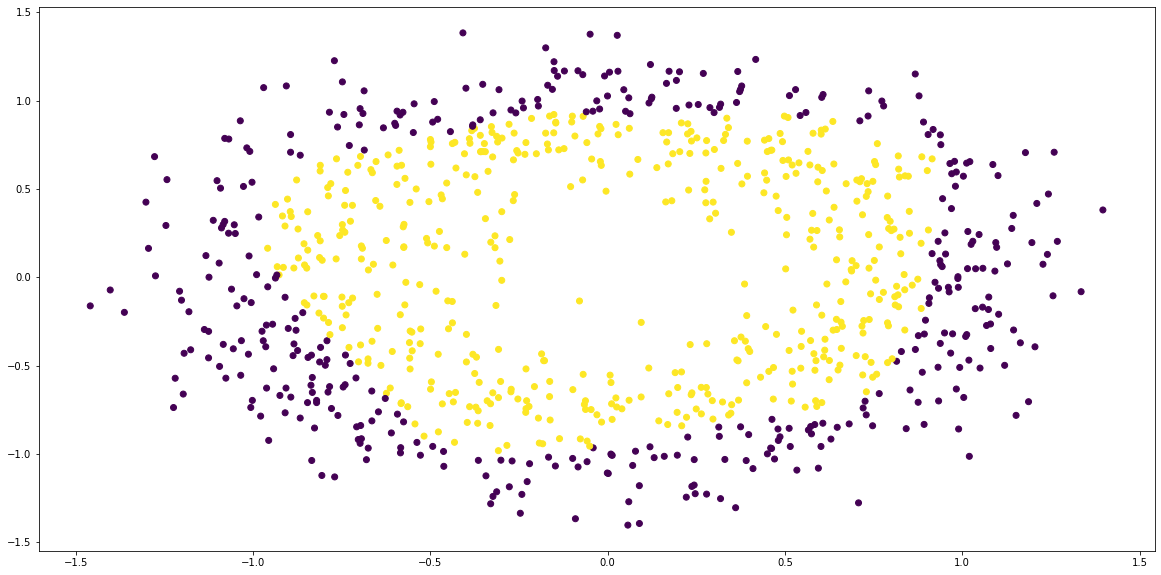

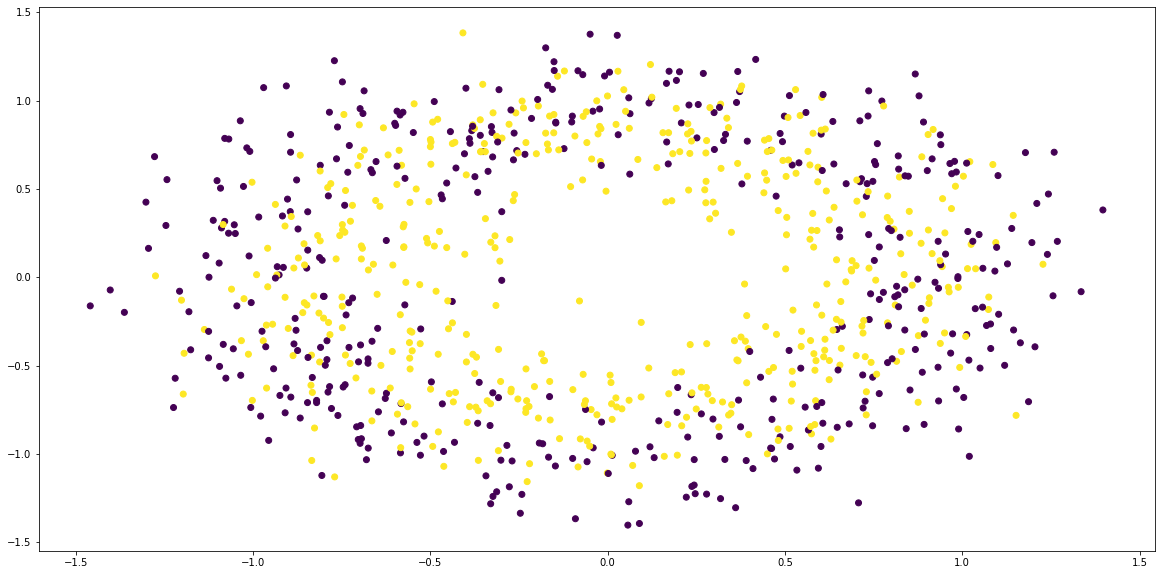

In [14]:
# Training accuracy
output = F.sigmoid(two_layer_network(x_train))
_, predictions = torch.max(output, axis=1)
print(classification_report(y_train, predictions))

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_train[:,0], x_train[:,1], c=predictions)

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

We observe that the accuracy improved greatly to ~70%. The model performs as well as a human's accuracy. We would consider such a model to have low bias especially compared to the previous model.

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        65
           1       0.52      0.71      0.60        35

    accuracy                           0.67       100
   macro avg       0.66      0.68      0.66       100
weighted avg       0.71      0.67      0.68       100



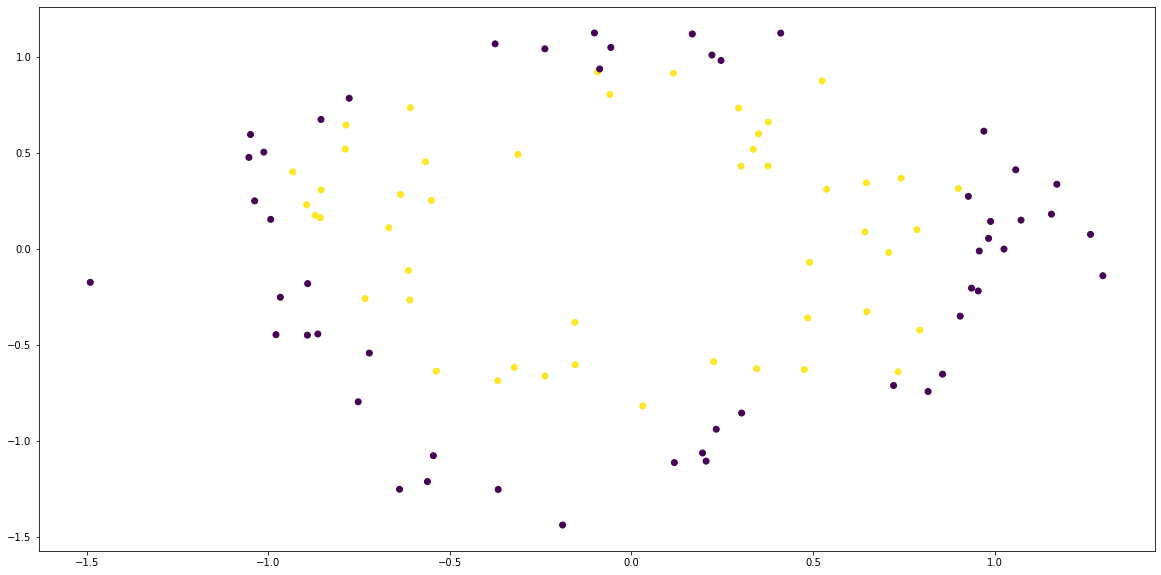

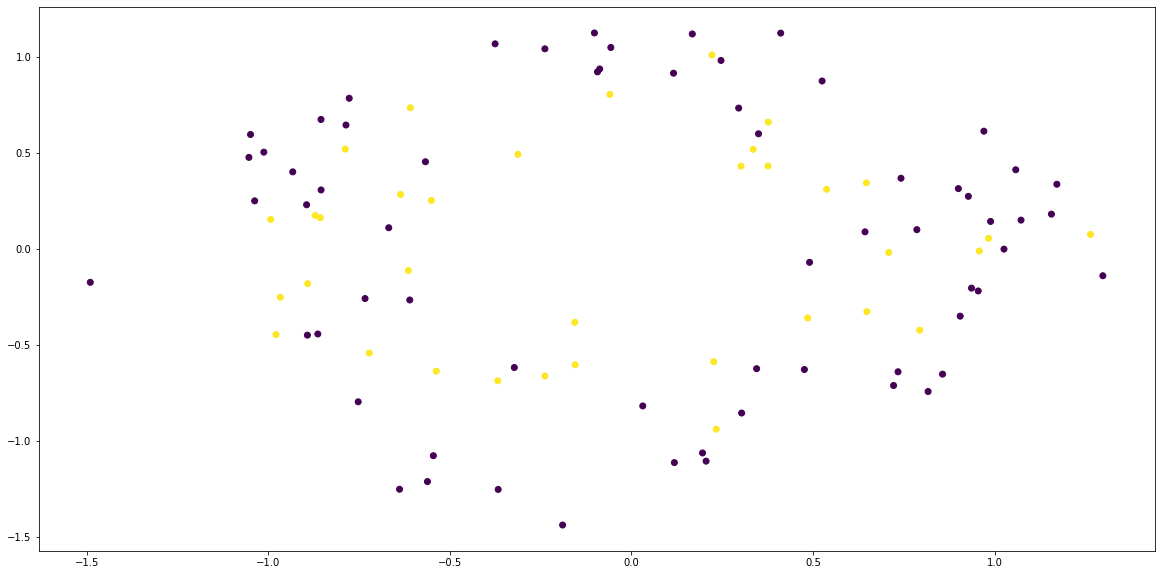

In [15]:
# Training accuracy
output = F.sigmoid(two_layer_network(x_val))
_, predictions = torch.max(output, axis=1)
print(classification_report(y_val, predictions))

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_val[:,0], x_val[:,1], c=predictions)

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_val[:,0], x_val[:,1], c=y_val)

In addition, the model also does well on the validation set with an accuracy of 69%. The model is able to generalise well onto the validation set and thus, has low variance as well.

# Complex model

In [20]:
class ThreeLayerNetwork(nn.Module):
    
    def __init__(self):
        super(ThreeLayerNetwork, self).__init__()
        
        # Increase number of neurons to 64 in the 1st layer and 128 in the 2nd
        self.linear1 = nn.Linear(2, 256)
        self.linear2 = nn.Linear(256, 1028)
        self.linear3 = nn.Linear(1028, 2056)
        self.outputlayer = nn.Linear(2056, 2)
        
    def forward(self, x):
        
        # applied an activation function to introduce non-linearity
        output = F.relu(self.linear1(x))
        output = F.relu(self.linear2(output))
        output = F.relu(self.linear3(output))
        output = self.outputlayer(output)
        
        return output

In [21]:
# initialise the Network
three_layer_network = ThreeLayerNetwork()

# cost - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(three_layer_network.parameters(), lr=0.1)

In [22]:
epochs = 500
loss = []
validation_loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    output = three_layer_network(x_train)# forward prop
    running_loss = criterion(output, y_train) # calculate loss
    loss.append(running_loss)
    running_loss.backward() # calculate gradients (backprop)
    optimiser.step() # update weights
    
    output = three_layer_network(x_val) # outputs of validation set
    val_loss = criterion(output, y_val) # validation loss
    validation_loss.append(val_loss)

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       435
           1       0.67      0.72      0.69       465

    accuracy                           0.67       900
   macro avg       0.67      0.67      0.67       900
weighted avg       0.67      0.67      0.67       900



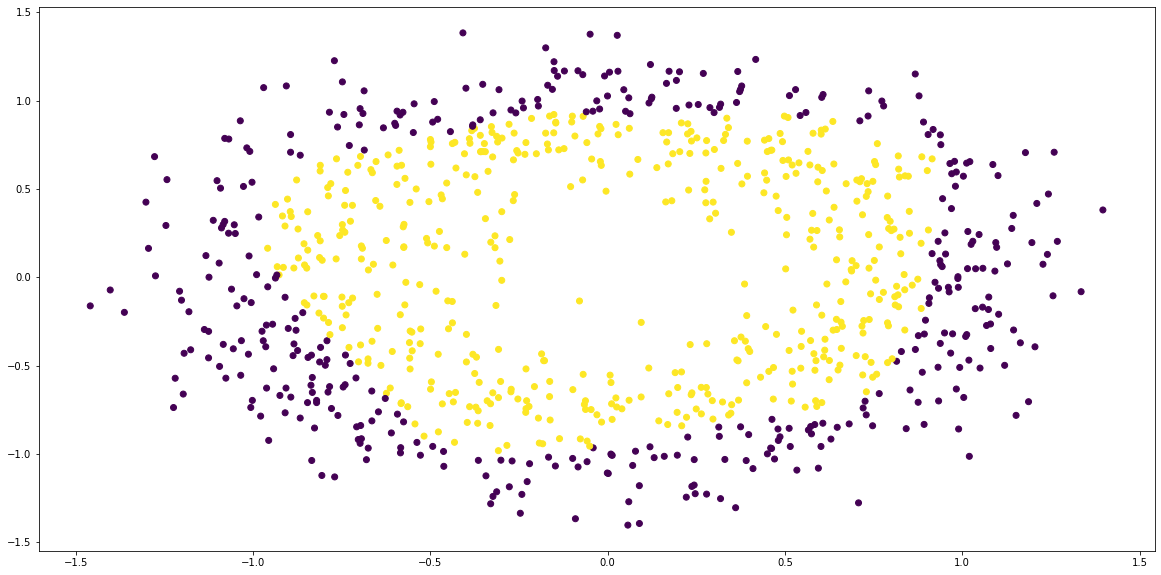

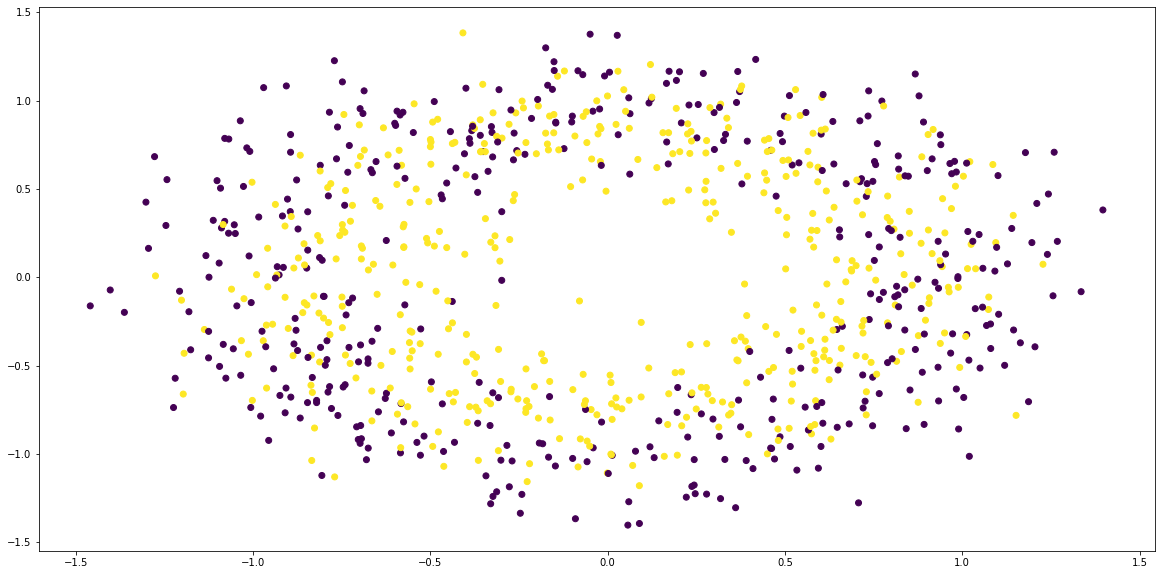

In [23]:
# Training accuracy
output = F.sigmoid(two_layer_network(x_train))
_, predictions = torch.max(output, axis=1)
print(classification_report(y_train, predictions))

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_train[:,0], x_train[:,1], c=predictions)

# plot predictions
plt.figure(figsize=[20,10])
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

Seems like I am unable to overfit the dataset forcefully.